In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

In [16]:
kunden_df = pd.read_csv("kunden.csv", sep=';')
print(kunden_df)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]


In [17]:
kunden_df.shape

(1104, 6)

# Aufgabe 1

In [18]:
kunden_bereinigt_df = pd.read_csv("df_final.csv", sep=',')
print(kunden_bereinigt_df)

# Kunde zählen (Kunde (1=ja) = 1) 
anzahl_autokauf_bereinigt_df = kunden_bereinigt_df [(kunden_bereinigt_df['Kunde (1=ja)'] == 1) & ( kunden_bereinigt_df['Preis'].notnull())].shape[0]

anzahl_autokauf_bereinigt_df

print(anzahl_autokauf_bereinigt_df)


      Alter  Einkommen  Geschlecht  Zeit KundeNr      Preis  \
0        30      39919           0    29   K1814        NaN   
1        41      53430           0    27   K1544        NaN   
2        64      73163           0    32   K1945        NaN   
3        41      36761           0    44   K1825        NaN   
4        35      42684           1    33   K1144        NaN   
...     ...        ...         ...   ...     ...        ...   
1981     70      69581           1    51   K0467  103751.58   
1982     38      48301           1    33   K0122   64230.98   
1983     67      63547           1    41   K1045  103123.57   
1984     37      32686           1    36   K1096   49215.87   
1985     55      71240           1    49   K0861  106132.59   

            Niederlassung  Kunde (1=ja)  
0                  Bayern             0  
1       Baden-Württemberg             0  
2       Baden-Württemberg             0  
3       Baden-Württemberg             0  
4     Nordrhein-Westfalen        

In [19]:
print(anzahl_autokauf_bereinigt_df)

1095


In [20]:
anzahl_autokauf = len(kunden_df)
print(anzahl_autokauf)

1104


In [21]:
kunden_df.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

# Aufgabe 2

In [22]:
kunden_bereinigt_df = pd.read_csv("df_final.csv", sep=',')

In [23]:
kunden_bereinigt_df.shape


(1986, 8)

In [24]:
kunden_bereinigt_df.dtypes

Alter              int64
Einkommen          int64
Geschlecht         int64
Zeit               int64
KundeNr           object
Preis            float64
Niederlassung     object
Kunde (1=ja)       int64
dtype: object

In [25]:
median_price = kunden_bereinigt_df["Preis"].dropna().median()
max_price = kunden_bereinigt_df["Preis"].max()
min_price = kunden_bereinigt_df["Preis"].min()

print(f"Höchstpreis: {max_price}")
print(f"Mindestpreis: {min_price}")
print(f"Durchschnittspreis: {median_price}")

Höchstpreis: 165482.31
Mindestpreis: 21471.65
Durchschnittspreis: 88889.58


In [26]:
#Datensatz kunden.csv 
## Kunden.csv hat den akurateren Durchschnitt 

preise = kunden_df.iloc[:, 2]

hoechstpreis = preise.max()
mindestpreis = preise.min()
durchschnittspreis = preise.mean()

print(f"Höchstpreis: {hoechstpreis}")
print(f"Mindestpreis: {mindestpreis}")
print(f"Durchschnittspreis: {durchschnittspreis}")

Höchstpreis: 165482.31
Mindestpreis: 21471.65
Durchschnittspreis: 88975.19871376813


# Aufgabe 3

In [27]:
Gesamtumsatz = durchschnittspreis*anzahl_autokauf

print(f"Gesamtumsatz: {Gesamtumsatz:.2f} Euro")

Gesamtumsatz: 98228619.38 Euro


# Aufgabe 4

In [28]:
#final.csv (7 gelöschte fehlerhafte Kundentdatein)
bundesland_auto2 = kunden_bereinigt_df['Niederlassung'].value_counts()
print(bundesland_auto2)

Niederlassung
Baden-Württemberg      379
Bayern                 336
Nordrhein-Westfalen    325
Berlin                 235
Niedersachsen          168
Hessen                 165
Sachsen                162
Thüringen               89
Hamburg                 67
Brandenburg             60
Name: count, dtype: int64


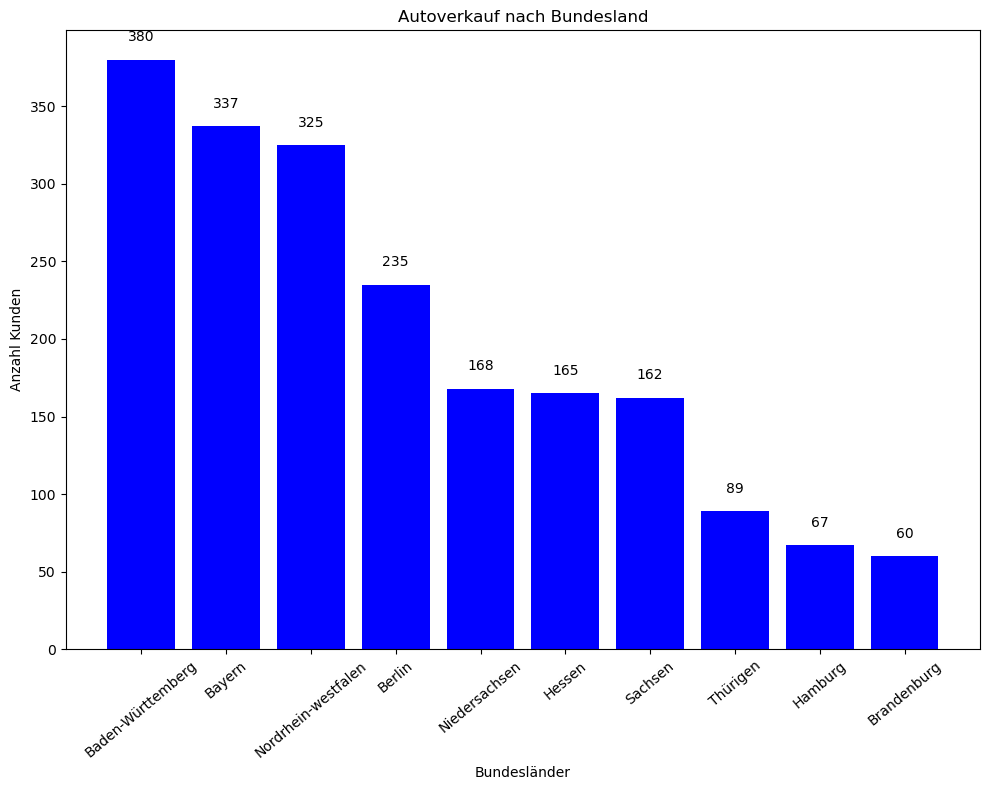

In [29]:
## Diagramm erstellen #df_final_csv

import matplotlib.pyplot as plt
kategorien = ['Baden-Württemberg', 'Bayern',"Nordrhein-westfalen", "Berlin", "Niedersachsen",
              "Hessen", "Sachsen", "Thürigen" , "Hamburg", "Brandenburg" ]

werte = [380, 337, 325, 235, 168, 165, 162, 89, 67, 60]


plt.figure(figsize=(10, 8))
bars = plt.bar(kategorien, werte, color=['blue', ])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom')


plt.title('Autoverkauf nach Bundesland')
plt.xlabel("Bundesländer")
plt.ylabel('Anzahl Kunden')

plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [30]:
bundesland_df = pd.read_csv('geo.txt', sep='\t')
print(bundesland_df)

     KundeNr          Niederlassung
0      K0001                Sachsen
1      K0002                    NRW
2      K0003                 Hessen
3      K0004                 Bayern
4      K0005                 Bayern
...      ...                    ...
1990   K1991                 Hessen
1991   K1992      Baden-Württemberg
1992   K1993    Nordrhein-Westfalen
1993   K1994                 Berlin
1994   K1995  Berlin-Charlottenburg

[1995 rows x 2 columns]


In [31]:
bundesland_df.dtypes

KundeNr          object
Niederlassung    object
dtype: object

In [32]:
bundesland_df['Niederlassung'] = bundesland_df['Niederlassung'].replace(['NRW', 'Düsseldorf'], 'Nordrhein-Westfalen')
print(bundesland_df)

     KundeNr          Niederlassung
0      K0001                Sachsen
1      K0002    Nordrhein-Westfalen
2      K0003                 Hessen
3      K0004                 Bayern
4      K0005                 Bayern
...      ...                    ...
1990   K1991                 Hessen
1991   K1992      Baden-Württemberg
1992   K1993    Nordrhein-Westfalen
1993   K1994                 Berlin
1994   K1995  Berlin-Charlottenburg

[1995 rows x 2 columns]


In [33]:
bundesland_df['Niederlassung'] = bundesland_df['Niederlassung'].replace(['Berlin-Charlottenburg', 'Berlin-Mitte', 'BERLIN'], 'Berlin'
                                                                       )
print(bundesland_df)

     KundeNr        Niederlassung
0      K0001              Sachsen
1      K0002  Nordrhein-Westfalen
2      K0003               Hessen
3      K0004               Bayern
4      K0005               Bayern
...      ...                  ...
1990   K1991               Hessen
1991   K1992    Baden-Württemberg
1992   K1993  Nordrhein-Westfalen
1993   K1994               Berlin
1994   K1995               Berlin

[1995 rows x 2 columns]


In [34]:
bundesland_auto = bundesland_df['Niederlassung'].value_counts()
print(bundesland_auto)

Niederlassung
Baden-Württemberg      382
Bayern                 338
Nordrhein-Westfalen    327
Berlin                 236
Niedersachsen          169
Hessen                 165
Sachsen                162
Thüringen               89
Hamburg                 67
Brandenburg             60
Name: count, dtype: int64


# Aufgabe 5

In [35]:
#df_final.csv (#unterschied ist nur der medain preis und 7 gelöschte Kundendatein )
bundesland_auto2 = {
"Baden-Württemberg": 380,
"Bayern": 337,
"Nordrhein-Westfalen": 325,
"Berlin": 235,
"Niedersachsen": 168,
"Hessen": 165,
"Sachsen": 162,
"Thüringen": 89,
"Hamburg ": 67,
"Brandenburg": 60,
}

bundesland_durchschnitt2 = {bundesland: median_price * anzahl_autos for bundesland, anzahl_autos in bundesland_auto2.items()}

for bundesland, gesamtumsatz in bundesland_durchschnitt2.items():
    print(f"{bundesland}: {gesamtumsatz:.2f}")

Baden-Württemberg: 33778040.40
Bayern: 29955788.46
Nordrhein-Westfalen: 28889113.50
Berlin: 20889051.30
Niedersachsen: 14933449.44
Hessen: 14666780.70
Sachsen: 14400111.96
Thüringen: 7911172.62
Hamburg : 5955601.86
Brandenburg: 5333374.80


In [36]:
bundesland_auto = {
    'Baden-Württemberg': 382,
    'Bayern': 338,
    'Nordrhein-Westfalen': 327,
    'Berlin': 236,
    'Niedersachsen': 169,
    'Hessen': 165,
    'Sachsen': 162,
    'Thüringen': 89,
    'Hamburg': 67,
    'Brandenburg': 60
}

bundesland_durchschnitt = {bundesland: durchschnittspreis * anzahl_autos for bundesland, anzahl_autos in bundesland_auto.items()}

for bundesland, gesamtumsatz in bundesland_durchschnitt.items():
    print(f"{bundesland}: {gesamtumsatz:.2f}")

Baden-Württemberg: 33988525.91
Bayern: 30073617.17
Nordrhein-Westfalen: 29094889.98
Berlin: 20998146.90
Niedersachsen: 15036808.58
Hessen: 14680907.79
Sachsen: 14413982.19
Thüringen: 7918792.69
Hamburg: 5961338.31
Brandenburg: 5338511.92


# Aufgabe 6

In [37]:
#df_final.csv #es sind nur 2 Frauen weniger da kunden.csv die No Value bei geschlecht auch nicht berücksichtigt
male_purchases = kunden_bereinigt_df[(kunden_bereinigt_df['Geschlecht'] == 1) & (kunden_bereinigt_df['Kunde (1=ja)'] == 1)].shape[0]
female_purchases = kunden_bereinigt_df[(kunden_bereinigt_df['Geschlecht'] == 0) & (kunden_bereinigt_df['Kunde (1=ja)'] == 1)].shape[0]


print(f"männer: {male_purchases}")
print(f"frauen: {female_purchases}")



if male_purchases > female_purchases:
    print("Es gibt mehr männliche Käufer.")
elif male_purchases < female_purchases:
    print("Es gibt mehr weibliche Käufer.")
else:
    print("Es gibt gleich viele Männer und Frauen.")

männer: 700
frauen: 395
Es gibt mehr männliche Käufer.


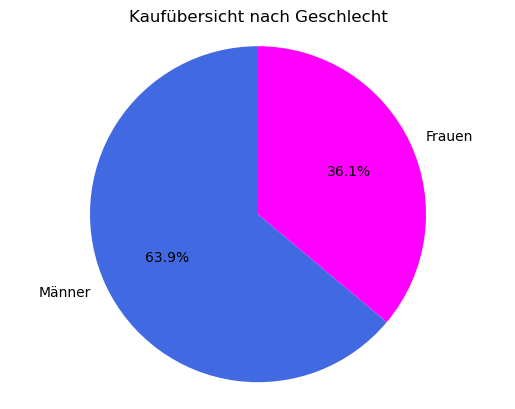

In [38]:
#df_final.csv Grafik
import matplotlib.pyplot as plt
labels="Männer","Frauen"
sizes= [701, 396]
colors= ["royalblue", "fuchsia"]

fig1, ax1= plt.subplots()
ax1.pie(sizes, labels=labels, 
colors=colors, autopct="%1.1f%%", 
startangle=90)

ax1.axis("equal")

plt.title("Kaufübersicht nach Geschlecht")

plt.show()

In [39]:
anzahl_männer = len(kunden_df[kunden_df['Geschlecht'] == 1])
anzahl_frauen = len(kunden_df[kunden_df['Geschlecht'] == 0])

print(f"männer: {anzahl_männer}")
print(f"frauen: {anzahl_frauen}")

if anzahl_männer > anzahl_frauen:
    print("Es gibt mehr männliche Käufer.")
elif anzahl_männer < anzahl_frauen:
    print("Es gibt mehr weibliche Käufer.")
else:
    print("Es gibt gleich viele Männer und Frauen.")

männer: 701
frauen: 398
Es gibt mehr männliche Käufer.


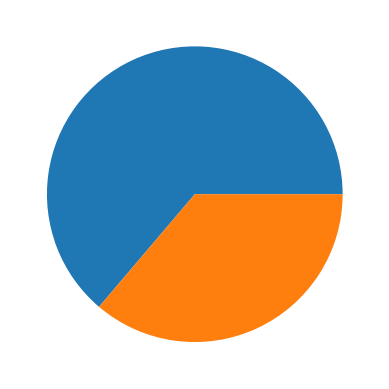

In [40]:
x = np.array([701, 398])
plt.pie(x)
plt.show()

# Aufgabe 7

In [42]:

mean_age_customers = kunden_bereinigt_df[kunden_bereinigt_df["Kunde (1=ja)"] == 1]["Alter"].mean()


# Ausgabe der Ergebnisse
print(f"Durchschnittsalter der Kunden: {mean_age_customers}")



Durchschnittsalter der Kunden: 50.32694063926941


# Aufgabe 8

In [44]:
#df_fianl.csv     
mean_age_visitors = kunden_bereinigt_df[kunden_bereinigt_df["Kunde (1=ja)"] == 0]["Alter"].mean()
print(f"Durchschnittsalter der Besucher: {mean_age_visitors}")

Durchschnittsalter der Besucher: 49.88103254769921


In [45]:
besucher_df = pd.read_csv ("Besucher.csv", sep= ";")
print(besucher_df)

     Alter           Einkommen  Geschlecht  Zeit KundeNr
0       30    39919,0953348874           0  29,0   K1814
1       41   53430,67308587748           0  27,0   K1544
2       64    73163,2169267002           0  32,0   K1945
3       41  36761,482581315344           0  44,0   K1825
4       35   42684,33163178136           1  33,0   K1144
..     ...                 ...         ...   ...     ...
886     32   34391,82496545645           1  48,0   K1211
887     41   68516,49543941053           0  34,0   K1375
888     65   89685,33344089528           0  23,0   K1965
889     68   95714,30526812703           0  32,0   K1540
890     49    73319,1870845747           0  27,0   K1207

[891 rows x 5 columns]


# Aufgabe 9

In [47]:


# Filtern nach männlichen Kunden =1 
male_customers = kunden_bereinigt_df[(kunden_bereinigt_df["Kunde (1=ja)"] == 1) & (kunden_bereinigt_df["Geschlecht"] == 1)]

# Berechnen
mean_age_male_customers = male_customers["Alter"].mean()

print(f"Durchschnittsalter männlicher Kunden: {mean_age_male_customers}")



Durchschnittsalter männlicher Kunden: 50.424285714285716


# Aufgabe 10

In [49]:
#df_final.csv
einkommen_zählen = kunden_bereinigt_df
durchschnittseinkommen = einkommen_zählen['Einkommen'].mean()
print(f'Durchschnittseinkommen Kunden: {durchschnittseinkommen: .2f}€')

Durchschnittseinkommen Kunden:  59038.75€


# Aufgabe 11

Pearson-Korrelation: Alter, Einkommen, Preis & Zeit
              Alter  Einkommen     Preis      Zeit
Alter      1.000000   0.784074  0.781911  0.313108
Einkommen  0.784074   1.000000  0.886091  0.392973
Preis      0.781911   0.886091  1.000000  0.705716
Zeit       0.313108   0.392973  0.705716  1.000000


<Axes: >

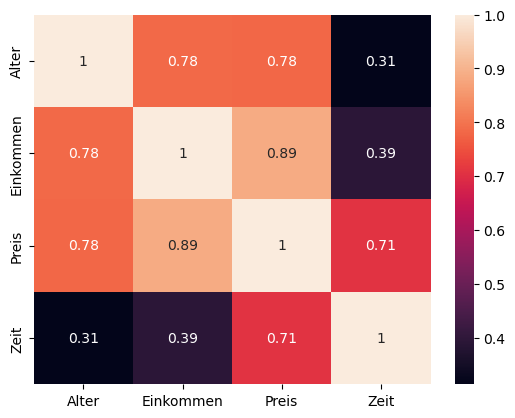

In [51]:
spalten_variablen = ['Alter', 'Einkommen', 'Preis', 'Zeit']
matrix_df = kunden_bereinigt_df[spalten_variablen]


korrelation_matrix = matrix_df.corr(method='pearson')

print('Pearson-Korrelation: Alter, Einkommen, Preis & Zeit')
print(korrelation_matrix)
df_corr = matrix_df.select_dtypes(include = np.number)
sns.heatmap(df_corr.corr(), annot = True)

# Aufgabe 12

In [53]:
#df_final.csv

kunden_bereinigt_df['Zeit'].describe()

sum_time_visitors = kunden_bereinigt_df[kunden_bereinigt_df['Kunde (1=ja)'] == 0]['Zeit'].sum()
sum_time_customers = kunden_bereinigt_df[kunden_bereinigt_df['Kunde (1=ja)'] == 1]['Zeit'].sum()


print(f'Summe der Testfahrtzeit von Besucher: {sum_time_visitors:.1F}')
print(f'Summe der Testfahrtzeit von Kunden: {sum_time_customers:.1F}')


Summe der Testfahrtzeit von Besucher: 31333.0
Summe der Testfahrtzeit von Kunden: 48525.0


In [54]:
#df_final.csv
durchschnittszeit_kunden = sum_time_customers / anzahl_autokauf_bereinigt_df
print(f'Durchschnittliche Testfahrzeit pro Kunde: {durchschnittszeit_kunden:.1F}')


Durchschnittliche Testfahrzeit pro Kunde: 44.3


In [55]:
besucher_df['Zeit'] = besucher_df['Zeit'].astype(object)
besucher_zeit = besucher_df['Zeit'].sum()

kunden_zeit = kunden_df['Zeit'].sum()

print("Summe der Zeit für Besucher:", besucher_zeit)
print("Summe der Zeit für Kunden:", kunden_zeit)

Summe der Zeit für Besucher: 29,027,032,044,033,027,059,040,031,044,035,037,025,056,030,034,033,040,021,049,037,021,025,046,021,014,046,037,034,044,030,046,046,021,046,022,030,054,057,049,033,045,043,038,047,021,045,027,041,042,030,050,050,035,031,024,037,044,037,049,044,030,039,028,027,051,044,040,023,036,035,034,019,025,044,036,025,037,036,041,028,030,034,046,033,028,015,052,045,046,042,019,045,042,032,036,030,036,022,035,030,024,045,041,036,05,027,035,023,029,035,036,034,012,026,062,052,042,021,028,020,029,045,039,025,040,017,037,047,021,042,029,032,043,023,044,044,055,038,039,036,025,034,029,034,055,060,032,032,036,026,031,041,048,033,044,059,041,03,026,034,031,035,031,036,048,050,037,036,036,040,032,041,032,041,013,045,043,038,024,041,025,030,018,024,050,031,024,045,025,020,017,045,019,030,047,043,037,034,025,034,036,044,030,032,027,033,044,039,031,028,053,040,044,043,036,030,032,040,049,034,031,041,015,028,022,026,032,047,055,047,014,027,041,031,026,045,026,027,018,032,018,020,03

In [56]:
durchschnittszeit_kunden2 = kunden_zeit / anzahl_autokauf
print(f'Durchschnittszeit pro Kunde: {durchschnittszeit_kunden2:.1F}')

Durchschnittszeit pro Kunde: 44.4


In [57]:
besucher_df.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

# Aufgabe 13

In [58]:
#df_final_csv
kunden_bereinigt_df['Kredit genommen'] = kunden_bereinigt_df['Einkommen'] < kunden_bereinigt_df['Preis']

kunden_ohne_kredit = kunden_bereinigt_df[kunden_bereinigt_df['Kunde (1=ja)'] == 1]['Kredit genommen'].value_counts().get(False, 0)
kunden_mit_kredit = kunden_bereinigt_df[kunden_bereinigt_df['Kunde (1=ja)'] == 1]['Kredit genommen'].value_counts().get(True, 0)

print("Anzahl Kunden ohne Kredit:", kunden_ohne_kredit)
print("Anzahl Kunden mit Kredit:", kunden_mit_kredit)




Anzahl Kunden ohne Kredit: 5
Anzahl Kunden mit Kredit: 1090


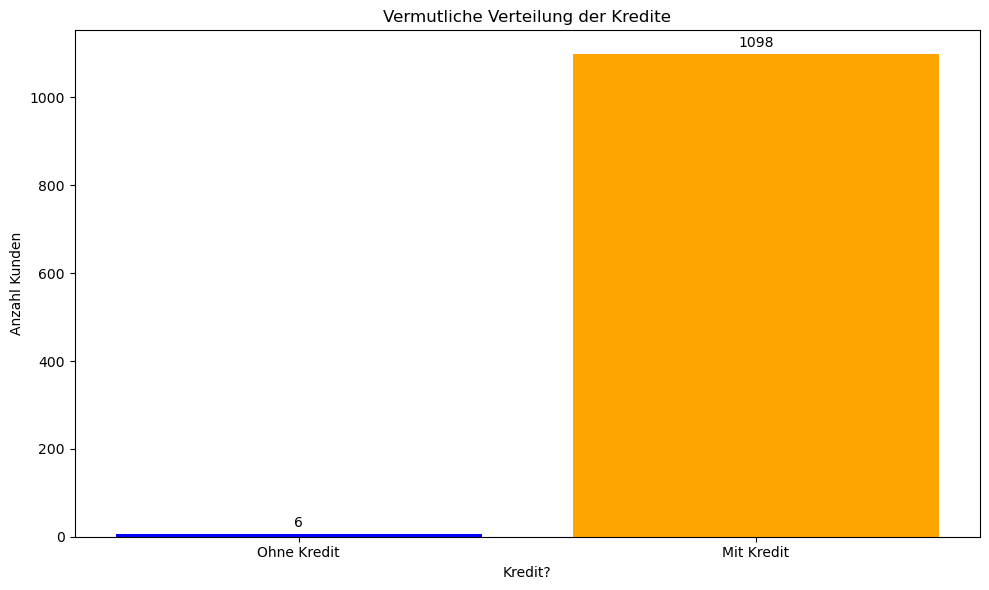

In [59]:
#df_final_csv
kategorien = ['Ohne Kredit', 'Mit Kredit']
werte = [6, 1098]


plt.figure(figsize=(10, 6))
bars = plt.bar(kategorien, werte, color=['blue', 'orange'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom')


plt.title('Vermutliche Verteilung der Kredite')
plt.xlabel('Kredit?')
plt.ylabel('Anzahl Kunden')


plt.tight_layout()
plt.show()


In [60]:
kunden_df['Kredit genommen'] = kunden_df['Einkommen'] < kunden_df['Preis']

kunden_ohne_kredit = kunden_df['Kredit genommen'].value_counts().get(False, 0)
kunden_mit_kredit = kunden_df['Kredit genommen'].value_counts().get(True, 0)

print("Anzahl Kunden ohne Kredit:", kunden_ohne_kredit)
print("Anzahl Kunden mit Kredit:", kunden_mit_kredit)

Anzahl Kunden ohne Kredit: 6
Anzahl Kunden mit Kredit: 1098


Verteilung Kredite


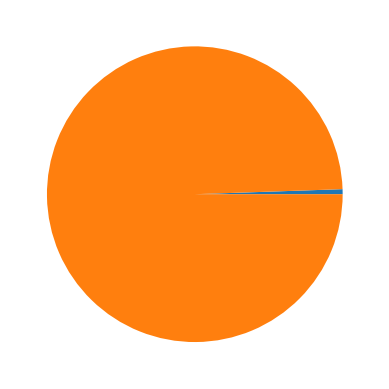

In [61]:
y = np.array([6, 1098])

print('Verteilung Kredite')
plt.pie(y)
plt.show()

# Aufgabe 14

In [62]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [63]:
kunden_bereinigt_df = pd.read_csv("df_final.csv", sep = ',')
kunden_bereinigt_df.head()

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Kunde (1=ja)
0,30,39919,0,29,K1814,NaN,Bayern,0
1,41,53430,0,27,K1544,NaN,Baden-Württemberg,0
2,64,73163,0,32,K1945,NaN,Baden-Württemberg,0
3,41,36761,0,44,K1825,NaN,Baden-Württemberg,0
4,35,42684,1,33,K1144,NaN,Nordrhein-Westfalen,0


In [71]:
reg = smf.ols("Preis ~ Alter+Einkommen+Geschlecht", data = kunden_bereinigt_df)
resultat_reg = reg.fit()
print(resultat_reg.summary())
coef = resultat_reg.params
coef

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1627.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:00:01   Log-Likelihood:                -11686.
No. Observations:                1095   AIC:                         2.338e+04
Df Residuals:                    1091   BIC:                         2.340e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    866.6766   1436.057      0.604      0.5

Intercept      866.676565
Alter          543.009642
Einkommen        1.008274
Geschlecht    2252.158464
dtype: float64

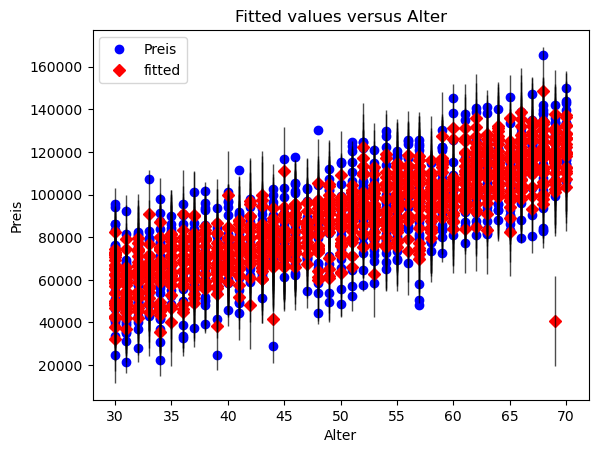

In [65]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(resultat_reg, 1, ax=ax)
plt.show()

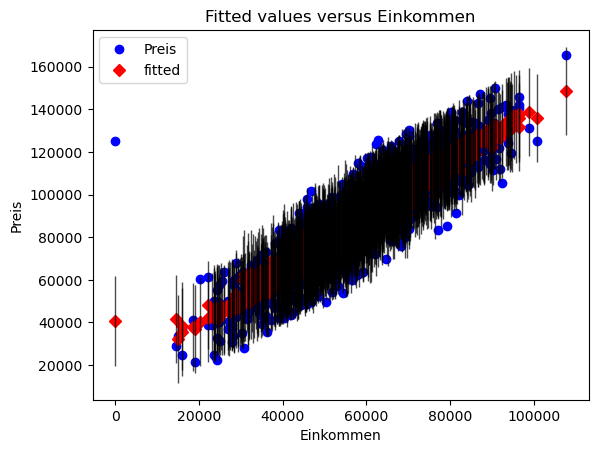

In [66]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(resultat_reg, 2, ax=ax)
plt.show()

Die sozioökonomischen Merkmale, die den Kaufpreis beeinflussen, sind den Alter, Einkommen und Geschlecht. Dank der Ordinary Least Squares (OLS) Model für die Multiple Linear Regression (weil wir mehreren unabhängigen Variablen haben) ist R^2 = 0.816.

# Aufgabe 15

In [67]:
new_data1 = np.array([1, 32, 30000, 1])
prognose_preis1 = reg.predict(resultat_reg.params, new_data1)

print(f"Prognostizierter Kaufpreis für den 32-jährigen Kunden: {prognose_preis1} Euro")

Prognostizierter Kaufpreis für den 32-jährigen Kunden: 50743.357755365774 Euro


In [68]:
new_data2 = np.array([1, 51, 54000, 1])
prognose_preis2 = (np.sum(resultat_reg.params*new_data2))

print(f"Prognostizierter Kaufpreis für den 51-jährigen Kunden: {prognose_preis2} Euro")

Prognostizierter Kaufpreis für den 51-jährigen Kunden: 85259.11230247609 Euro


# Aufgabe 16

In [74]:
cov_matrix = resultat_reg.cov_params()
residual_std = np.sqrt(np.sum(resultat_reg.resid**2)/resultat_reg.df_resid)

beta_std = coef / (residual_std * np.sqrt(np.diag(cov_matrix)))

print("standartisierte Koeffizienten (Beta Koeffizienten):")
print(beta_std)

standartisierte Koeffizienten (Beta Koeffizienten):
Intercept     0.000058
Alter         0.001291
Einkommen     0.003323
Geschlecht    0.000327
dtype: float64


Das Einkommen hat den größten Koeffizienten, was bedeutet, dass der Preis des Autos (die abhängige Variable) am stärksten durch das Einkommen beeinflusst wird.

# Aufgabe 17

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
# Auswahl der unabhängigen Variablen (Alter, Einkommen, Geschlecht)
X_logistic = kunden_bereinigt_df[['Alter', 'Einkommen', 'Geschlecht']]
y_logistic = kunden_bereinigt_df['Kunde (1=ja)']

# Erstellung des logistischen Regressionsmodells
logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)

# Ausgabe der Modellkoeffizienten
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print("Koeffizienten:", coefficients)
print("Achsenabschnitt:", intercept)

Koeffizienten: [[3.50233605e-09 3.08505833e-06 9.03553587e-11]]
Achsenabschnitt: [6.78099306e-11]


# Aufgabe 18 

In [77]:
# Unabhängige Variablen (Alter, Einkommen, Testzeit) und abhängige Variable (Kunde ja/nein)
X = kunden_bereinigt_df[['Alter', 'Einkommen', 'Zeit']]
y = kunden_bereinigt_df ['Kunde (1=ja)']

# Erstellung und Training des logistischen Regressionsmodells
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Prognose für die gewünschten Kundenprofile
# Kunde 1: 32 Jahre alt, Einkommen 30.000 Euro, 30 Minuten Testzeit
# Kunde 2: 51 Jahre alt, Einkommen 54.000 Euro, 45 Minuten Testzeit
customer_profiles = pd.DataFrame({
    'Alter': [32, 51],
    'Einkommen': [30000, 54000],
    'Zeit': [30, 45]
})

# Berechnung der Kaufwahrscheinlichkeiten
purchase_probabilities = logistic_model.predict_proba(customer_profiles)

# Anzeige der Wahrscheinlichkeiten für 'Kunde = Ja' (1)
probabilities = purchase_probabilities[:, 1]
print(f"Wahrscheinlichkeit für Kunde 1 (32 Jahre, 30.000 Euro, 30 Min. Testzeit): {probabilities[0]:.6f}")
print(f"Wahrscheinlichkeit für Kunde 2 (51 Jahre, 54.000 Euro, 45 Min. Testzeit): {probabilities[1]:.6f}")

Wahrscheinlichkeit für Kunde 1 (32 Jahre, 30.000 Euro, 30 Min. Testzeit): 0.715339
Wahrscheinlichkeit für Kunde 2 (51 Jahre, 54.000 Euro, 45 Min. Testzeit): 0.719300


# Aufgabe 19. 
Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? 
Stellen Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen  der Daten durchgeführt haben

Bei der Zusammenführung der Datensätze besucher.csv und kunden.csv mussten vorab verschiedene Operationen in Python mit der Bibliothek Pandas durchgeführt werden, um die Daten für die Analyse vorzubereiten. Zuerst wurden die Datentypen ,sowie Trennzeichen der Nachkommastelle standardisiert , um die Konsistenz der Daten zu gewährleisten. 

In [ ]:
besucher_df['Zeit'] = besucher_df['Zeit'].str.replace(',', '.').astype(float).astype(int)
kunden_df['Zeit'] = kunden_df ['Zeit'].astype(int)
besucher_df['Geschlecht'] = besucher_df['Geschlecht'].astype(int)
kunden_df['Geschlecht'] = kunden_df ['Geschlecht'].astype(int)
besucher_df['Alter'] = besucher_df['Alter'].astype(int)
kunden_df['Alter'] = kunden_df ['Alter'].astype(int)

Unsinnige Einträge in den Umfragen wurden identifiziert und nach Beratung im Team gelöscht, da wir als Analysten nicht feststellen können, welche anderen Angaben dieser Kunden und Besucher ernsthaft gemeint waren bzw. damit wir unsere Analyse auf verglichbaren Angaben ohne willkürliche Anpassung einzelner Daten durchführen können können. Anschließend wurden die beiden Datein "outer merged":

In [ ]:
#Löschen von Eintragung wenn Gender fehlt:
besucher_df = besucher_df[besucher_df['Geschlecht'] != -1]
kunden_df = kunden_df[kunden_df['Geschlecht'] != -1]

#Ausschließen von unrealistischem Einkommen und Alter:
merged_minus_df = merged_df[(merged_df['Einkommen'] <= 100000000) & (merged_df['Einkommen'] >= 0)& (merged_df["Alter"]<= 90)]


Anschließend wurden nachvollziehbare Fehler wie beispielsweise bei zu genauer Angabe der Niederlassung dem
“richtigen” Bundeslandes einheitlich zugeordnet:


In [ ]:
geo_data = geo_data.replace('Düsseldorf', 'Nordrhein-Westfalen')
geo_data = geo_data.replace('NRW', 'Nordrhein-Westfalen')
geo_data = geo_data.replace('BERLIN', 'Berlin')
geo_data = geo_data.replace('Berlin-Charlottenburg', 'Berlin')

Schlussendlich wurden die Geo und die bereit zusammengefügte CSV Datei unter der Berücksichtigung der Trennzeichen 
”inner gemerged”, eine Hilfsvariable zur Identifikation von Kunden hinzugefügt und der Datensatz final als
df_final.csv abgespeichert.

# Aufgabe 20
Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.

Von Operativen Vorteil wäre es eine Fahrzeugnummer einzuführen die die Marke, das Modell sowie den Einkaufspreis des Modells erfasst. Um anschließend eine Analyse durchzuführen in der Profitmargen, Umsatz als auch Gewinnanteile von den einzelnen Modellen  Kundencharakteristiken und Niederlassung zuzuordnen werden, um in den nächsten Jahren den Umsatz als auch Gewinn zu maximieren.  

Desweiteren könnte eine digitale Umfrage versendet werden, wo die einzelenen Felder für die Informationen der Befragten, durch Filter die Angabe vom unrealistische Zahlen nicht zulassen.